In [27]:
using JuMP
using Gurobi
using Graphs, SimpleWeightedGraphs
using GraphPlot

using CPLEX
using SCIP

In [28]:
instance = "../data/kmbs/RANDOM/random_n60_k3_pos30_neg5_err20_4.g"

file = open(instance)

fileText = read(file, String)
tokens = split(fileText) 

aux = 1
N = parse(Int,tokens[aux])

aux += 1
M = parse(Int,tokens[aux])

#G = Graph(N)
G = SimpleWeightedGraph(N)

for t in 1:M
    aux += 1
    i = parse(Int,tokens[aux])
    aux += 1
    j = parse(Int,tokens[aux])
    aux += 1
    e = parse(Int,tokens[aux])
    #println(i,j,e)
    add_edge!(G, i, j, e)
end

close(file)

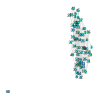

In [29]:
gplot(G, nodelabel=1:N)

In [30]:
collect(edges(G))

229-element Vector{SimpleWeightedEdge{Int64, Float64}}:
 Edge 2 => 5 with weight 1.0
 Edge 1 => 7 with weight -1.0
 Edge 5 => 8 with weight 1.0
 Edge 3 => 9 with weight -1.0
 Edge 1 => 10 with weight 1.0
 Edge 3 => 10 with weight -1.0
 Edge 2 => 11 with weight 1.0
 Edge 7 => 11 with weight -1.0
 Edge 3 => 12 with weight 1.0
 Edge 6 => 12 with weight 1.0
 Edge 1 => 13 with weight 1.0
 Edge 5 => 14 with weight 1.0
 Edge 11 => 14 with weight 1.0
 ⋮
 Edge 5 => 59 with weight 1.0
 Edge 11 => 59 with weight 1.0
 Edge 13 => 59 with weight 1.0
 Edge 14 => 59 with weight 1.0
 Edge 20 => 59 with weight 1.0
 Edge 32 => 59 with weight 1.0
 Edge 35 => 59 with weight 1.0
 Edge 38 => 59 with weight -1.0
 Edge 41 => 59 with weight 1.0
 Edge 53 => 59 with weight 1.0
 Edge 55 => 59 with weight -1.0
 Edge 56 => 59 with weight 1.0

In [31]:
vk = Set()
k = 3

nodes = vertices(G)

for i in nodes
    #println(i)
    for j in 1:k
        a = (i,j)
        #print(j)
        push!(vk, a)
    end
end

In [32]:
for i in vk 
    println(i) 
end

(23, 2)
(41, 2)
(34, 1)
(50, 1)
(42, 1)
(46, 3)
(59, 2)
(57, 3)
(26, 2)
(49, 1)
(1, 3)
(22, 3)
(21, 1)
(33, 3)
(38, 1)
(46, 2)
(57, 2)
(40, 3)
(53, 1)
(47, 1)
(5, 3)
(55, 3)
(1, 2)
(3, 1)
(22, 2)
(45, 3)
(33, 2)
(40, 2)
(56, 1)
(35, 1)
(60, 1)
(5, 2)
(55, 2)
(28, 3)
(45, 2)
(36, 3)
(7, 3)
(25, 3)
(12, 1)
(18, 3)
(23, 1)
(41, 1)
(16, 3)
(28, 2)
(19, 3)
(36, 2)
(44, 3)
(31, 3)
(59, 1)
(7, 2)
(25, 2)
(29, 3)
(26, 1)
(18, 2)
(16, 2)
(19, 2)
(17, 3)
(44, 2)
(31, 2)
(46, 1)
(57, 1)
(29, 2)
(51, 3)
(48, 3)
(15, 3)
(1, 1)
(22, 1)
(17, 2)
(30, 3)
(33, 1)
(6, 3)
(40, 1)
(51, 2)
(48, 2)
(5, 1)
(15, 2)
(55, 1)
(4, 3)
(13, 3)
(45, 1)
(30, 2)
(52, 3)
(6, 2)
(43, 3)
(11, 3)
(39, 3)
(4, 2)
(13, 2)
(2, 3)
(10, 3)
(27, 3)
(28, 1)
(52, 2)
(36, 1)
(20, 3)
(43, 2)
(11, 2)
(7, 1)
(25, 1)
(9, 3)
(39, 2)
(18, 1)
(2, 2)
(10, 2)
(16, 1)
(27, 2)
(19, 1)
(20, 2)
(44, 1)
(31, 1)
(24, 3)
(8, 3)
(37, 3)
(29, 1)
(9, 2)
(14, 3)
(17, 1)
(24, 2)
(8, 2)
(37, 2)
(51, 1)
(32, 3)
(14, 2)
(48, 1)
(15, 1)
(54, 3)
(30, 1)
(6, 

In [ ]:
EN = Set()
for e in edges(G)
    if G[e, Val(:weight)] == -1
        push!(EN, e) 
        #println(G[e, Val(:weight)])
        #println(get_weight(G, e))
    end
end

#print(EN)

Set(Any[Edge 36 => 57 with weight -1.0, Edge 27 => 42 with weight -1.0, Edge 1 => 7 with weight -1.0, Edge 2 => 58 with weight -1.0, Edge 3 => 9 with weight -1.0, Edge 43 => 52 with weight -1.0, Edge 29 => 31 with weight -1.0, Edge 1 => 54 with weight -1.0, Edge 3 => 10 with weight -1.0, Edge 30 => 41 with weight -1.0, Edge 5 => 41 with weight -1.0, Edge 43 => 53 with weight -1.0, Edge 2 => 44 with weight -1.0, Edge 38 => 48 with weight -1.0, Edge 27 => 51 with weight -1.0, Edge 32 => 53 with weight -1.0, Edge 41 => 53 with weight -1.0, Edge 38 => 50 with weight -1.0, Edge 27 => 55 with weight -1.0, Edge 5 => 53 with weight -1.0, Edge 23 => 33 with weight -1.0, Edge 17 => 31 with weight -1.0, Edge 50 => 54 with weight -1.0, Edge 25 => 26 with weight -1.0, Edge 29 => 55 with weight -1.0, Edge 30 => 57 with weight -1.0, Edge 12 => 39 with weight -1.0, Edge 18 => 50 with weight -1.0, Edge 5 => 43 with weight -1.0, Edge 53 => 55 with weight -1.0, Edge 5 => 54 with weight -1.0, Edge 48 => 5

In [42]:
EP = Set()
for e in edges(G)
    if G[e, Val(:weight)] == 1
        push!(EP, e) 
        #println(G[e, Val(:weight)])
        #println(get_weight(G, e))
    end
end

#print(EP)

In [45]:
K = range(1,k)
#println(K)
#for i in K
#    println(i)
#end

1:3

In [36]:
for e in edges(G)
    u = src(e)
    v = dst(e)
    #println(e,":",u,"-",v)
end

In [ ]:
# paraments: 
# https://docs.gurobi.com/projects/optimizer/en/current/reference/parameters.html
# https://www.ibm.com/docs/en/icos/22.1.0?topic=cplex-list-parameters
solver = "cplex"
method = "mip"
maxtime = 3600
tolgap = 1e-6
disablesolver = 0
maxnodes = 10000000.0
threads = 1
presolve = 0 # default -1
# Controls the presolve level. 
# A value of -1 corresponds to an automatic setting. 
# Other options are off (0), 
# conservative (1), 
# or aggressive (2). 
# More aggressive application of presolve takes more time, but can sometimes lead to a significantly tighter model.
cuts = 0 # default -1
# Global cut aggressiveness setting. 
# Use value 0 to shut off cuts, 
# 1 for moderate cut generation, 
# 2 for aggressive cut generation, 
# and 3 for very aggressive cut generation. 
# The default -1 value chooses automatically. 
# This parameter is overridden by the parameters that control individual cut types (e.g.,
mipfocus = 0 # default 0
# The MIPFocus parameter allows you to modify your high-level solution strategy, depending on your goals
# more interested in finding feasible solutions quickly, you can select MIPFocus=1. 
# wish to focus more attention on proving optimality, select MIPFocus=2. 
# MIPFocus=3 to focus on the bound.
brdir = -1 #Decides which branch, the up (1) or the down branch(-1), should be taken first at each node.
emphasis = 0 #0:5
# 0	Balance optimality and feasibility (default)
# 1	Emphasize feasibility over optimality
# 2	Emphasize optimality over feasibility
# 3	Emphasize moving best bound
# 4	Emphasize finding hidden feasible solutions
# 5	Emphasize finding high quality feasible solutions earlier

0

In [ ]:
### select solver and define parameters ###
if solver == "gurobi"  
    model = Model(Gurobi.Optimizer)
    set_optimizer_attribute(model,"TimeLimit",maxtime) # time limit
    set_optimizer_attribute(model,"MIPGap",tolgap) # relative MIP optimality gap
    #set_optimizer_attribute(model,"NodeLimit",maxnodes) 
    set_optimizer_attribute(model,"Threads",threads) # number of threads
    #set_optimizer_attribute(model,"Method",-1) # method used in root node
    #set_optimizer_attribute(model,"NodeMethod",0) # method used to solve MIP node relaxations
    #set_optimizer_attribute(model,"SolutionLimit",1) # first viable solution
    set_optimizer_attribute(model,"Presolve",presolve)
    set_optimizer_attribute(model,"Cuts",cuts)
    set_optimizer_attribute(model,"MIPFocus",mipfocus)
    set_optimizer_attribute(model,"NodefileStart",0.5)
    #set_optimizer_attribute(model,"NodefileDir","/home/jossian/Downloads/report")
elseif solver == "cplex"
    model = Model(CPLEX.Optimizer)
    set_optimizer_attribute(model,"CPX_PARAM_TILIM",maxtime) # time limit
    set_optimizer_attribute(model,"CPX_PARAM_EPGAP",tolgap) # relative MIP optimality gap
    #set_optimizer_attribute(model,"CPX_PARAM_LPMETHOD",0) # method used in root node
    #set_optimizer_attribute(model,"CPX_PARAM_NODELIM",maxnodes) # MIP node limit
    set_optimizer_attribute(model,"CPX_PARAM_THREADS",threads) # number of threads
    set_optimizer_attribute(model,"CPX_PARAM_BRDIR",brdir)
    set_optimizer_attribute(model,"CPXPARAM_Preprocessing_Presolve",presolve)
    set_optimizer_attribute(model,"CPXPARAM_Emphasis_MIP",emphasis)
    #set_optimizer_attribute(model,"CPXPARAM_Benders_Strategy",3) # 3 full      
elseif params.solver == "scip"
    model = Model(SCIP.Optimizer)
else
    println("no solver selected")
    return 0
end

@variable(model, y[edges(G)], Bin)
@variable(model, x[vk], Bin)

### objective function ###
@objective(model, Min, sum(y[e] for e in edges(G)))

for v in nodes
    @constraint(model, sum(x[(v,i)] for i=1:k) == 1.0)
end

for e in EN
    u = src(e)
    v = dst(e)
    #println(e)
    for i in 1:k
        @constraint(model, x[(u,i)] + x[(v,i)] <= 1 + y[e])
    end
end

for e in EP
    u = src(e)
    v = dst(e)
    #println(e)
    for i in 1:k
        @constraint(model, x[(u,i)] >= x[(v,i)] - y[e])
    end
end

for e in EP
    u = src(e)
    v = dst(e)
    #println(e)
    for i in 1:k
        @constraint(model, x[(v,i)] >= x[(u,i)] - y[e])
    end
end

optimize!(model)

Version identifier: 22.1.1.0 | 2022-11-28 | 9160aff4d
CPXPARAM_Preprocessing_Presolve                  0
CPXPARAM_Threads                                 1
CPXPARAM_MIP_Strategy_Branch                     -1
CPXPARAM_MIP_Limits_Nodes                        10000000
CPXPARAM_TimeLimit                               3600
CPXPARAM_MIP_Tolerances_MIPGap                   9.9999999999999995e-07
Found incumbent of value 229.000000 after 0.00 sec. (0.38 ticks)
Clique table members: 60.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: none, using 1 thread.
Root relaxation solution time = 0.00 sec. (3.44 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap

*     0+    0                          229.0000        0.0000           100.00%
      0     0        0.0000   118      229.0000        0.0000      120  100.00%
*     0+    0                          

In [54]:
objbound = objective_bound(model)
nnodes = node_count(model)
mgap = MOI.get(model,MOI.RelativeGap())
objval = objective_value(model)
rtime = solve_time(model)

122.00975108146667

In [55]:
println("objbound = ", objbound)
println("objval = ", objval)
println("mipgap = ", mgap)
println("numnodes = ", nnodes)
println("runtime = ", rtime)

objbound = 47.0
objval = 47.0
mipgap = 0.0
numnodes = 22400
runtime = 122.00975108146667


In [82]:
for e in edges(G)
    if value(y[(e)]) > 0.0
        println(e, " = ", value(y[(e)]))
    end
end

Edge 1 => 7 with weight -1.0 = 1.0
Edge 3 => 9 with weight -1.0 = 1.0
Edge 1 => 18 with weight -1.0 = 1.0
Edge 3 => 18 with weight 1.0 = 1.0
Edge 2 => 20 with weight -1.0 = 1.0
Edge 10 => 21 with weight 1.0 = 1.0
Edge 19 => 21 with weight 1.0 = 1.0
Edge 15 => 24 with weight 1.0 = 1.0
Edge 9 => 27 with weight 1.0 = 1.0
Edge 13 => 28 with weight -1.0 = 1.0
Edge 9 => 30 with weight 1.0 = 1.0
Edge 24 => 33 with weight 1.0 = 1.0
Edge 22 => 35 with weight 1.0 = 1.0
Edge 16 => 38 with weight 1.0 = 1.0
Edge 12 => 39 with weight -1.0 = 1.0
Edge 34 => 39 with weight 1.0 = 1.0
Edge 5 => 41 with weight -1.0 = 1.0
Edge 24 => 42 with weight 1.0 = 1.0
Edge 2 => 44 with weight -1.0 = 1.0
Edge 8 => 44 with weight -1.0 = 1.0
Edge 33 => 44 with weight 1.0 = 1.0
Edge 18 => 45 with weight 1.0 = 1.0
Edge 5 => 46 with weight 1.0 = 1.0
Edge 10 => 46 with weight -1.0 = 1.0
Edge 5 => 47 with weight -1.0 = 1.0
Edge 18 => 47 with weight 1.0 = 1.0
Edge 32 => 47 with weight -1.0 = 1.0
Edge 30 => 48 with weight 1.0 